In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from scipy.integrate import quad
from scipy.special import erf

import common_functions as cf


In [2]:
def fixation_prob_steady_state(a,N):
    integral = cf.fixation_probability_steady_state(x=1/(2*N), a=a)
    return integral

def frequency_after_shift(a,N,x,shift,Va):
    change = shift * a * x * (1-x) / Va
    new_x = x + change
    if new_x < 0:
        new_x = 0
    if new_x > 1:
        new_x = 1
    return new_x
    
def fixation_prob_shift(a,N,shift,Va):
    # integrand = lambda x: folded_sojourn_time(a,x,N) * fixation_prob_allele_given_x(a,frequency_after_shift(a,N,x,shift,Va),N)
    # integral, error = quad(integrand, 0,1/2,points=[1/(2*N)])
    integral = cf.fixation_probability_steady_state(x=frequency_after_shift(a,N,1/(2*N),shift,Va), a=a)
    return integral

def plot_fixation_prob(fig_width,fig_height,N,shift,Va):
    fig = plt.figure(figsize=(fig_width,fig_height),dpi=300)
    ax = fig.add_subplot(1,1,1)
    
    S_values = np.logspace(-2,2,100)
    a_values = np.sqrt(S_values)
    fp_steady = [fixation_prob_steady_state(a,N) for a in a_values]
    fp_aligned = [fixation_prob_shift(a,N,shift,Va) for a in a_values]
    fp_opposing = [fixation_prob_shift(a,N,-shift,Va) for a in a_values]
    fp_neutral = fixation_prob_steady_state(a=0.0001,N=N)
    ax.plot(S_values,[fp/fp_neutral for fp in fp_steady],label='MSDB',color='black')
    ax.plot(S_values,[fp/fp_neutral for fp in fp_aligned],label='Aligned',color='blue')
    ax.plot(S_values,[fp/fp_neutral for fp in fp_opposing],label='Opposing',color='green')
    ax.set_xscale('log')
    ax.set_ylabel('Fixation probability (relative to neutral)',fontsize=11)
    ax.set_xlabel(r'Effect size squared ($S_e=a^2$)',fontsize=11)
    ax.set_xlim(0.01,100)
    ax.set_ylim(0,1.05)
    ax.legend(edgecolor='black',loc='upper right',fontsize=11,handlelength=1)

    plt.tight_layout()
    # check if figure axes is square
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width_inches, height_inches = bbox.width, bbox.height
    return fig, fig_width, fig_height, width_inches, height_inches


Adjusting figure width from 4.00 to 4.32 inches to achieve target width of 4.00 inches.


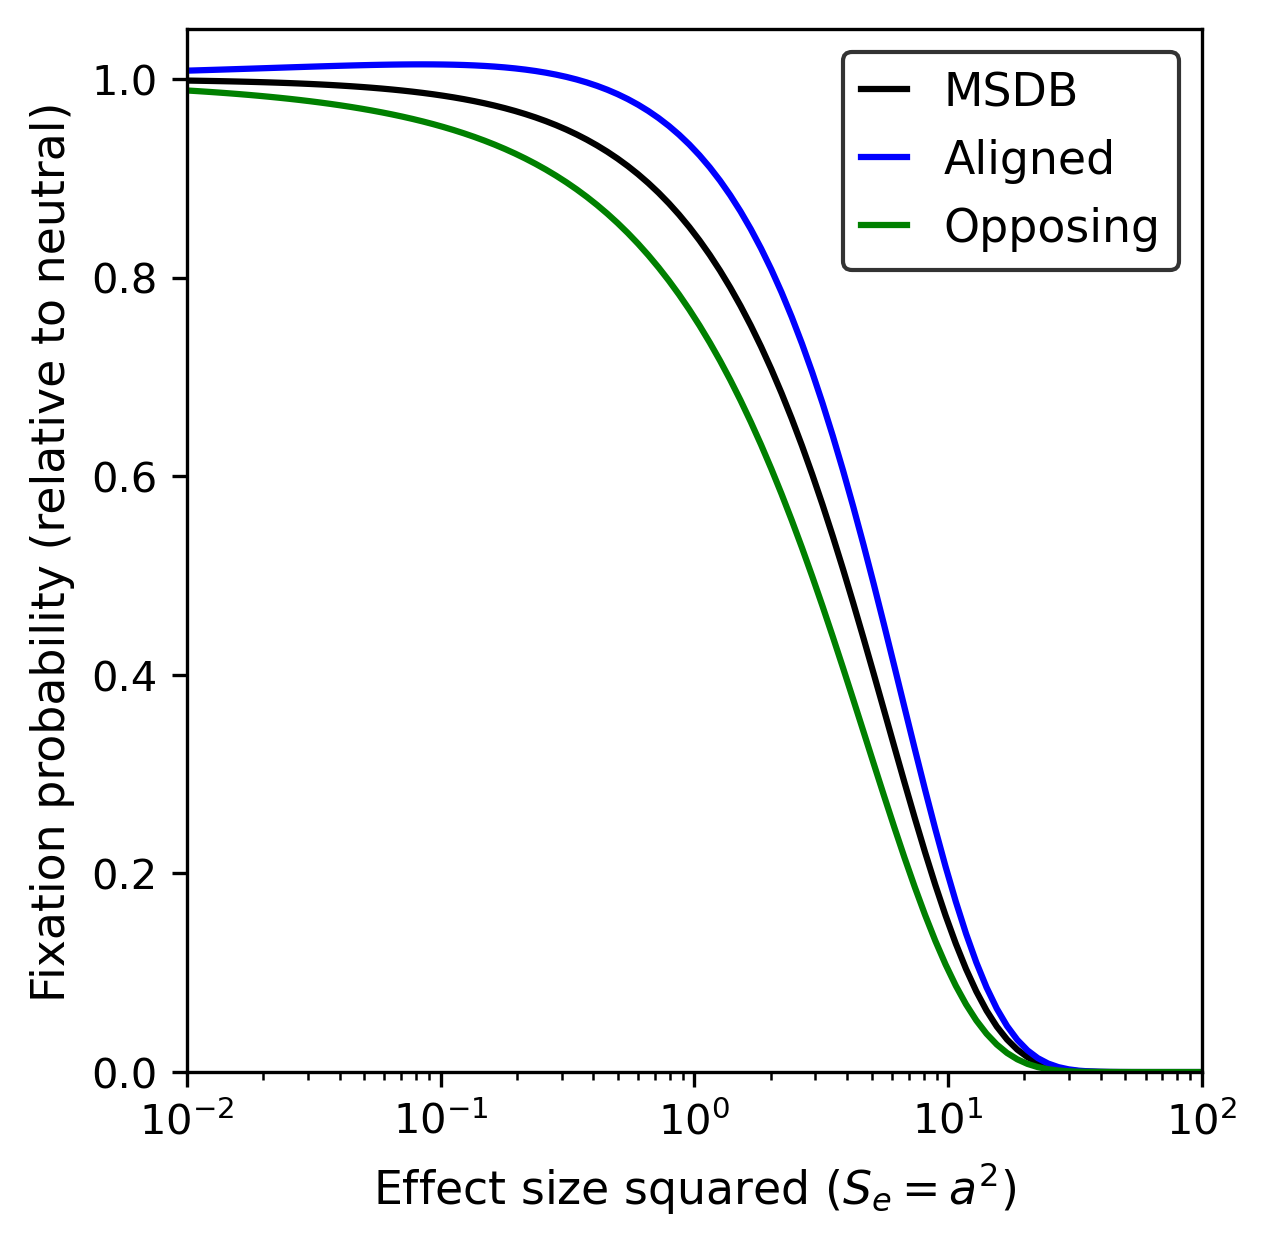

In [7]:
cf.make_figure_set_width(fig_function=plot_fixation_prob,fig_width=4,fig_height=4,target_width_inches=4,filename='./Figures/Fig_S3.png',N=5000,shift=40,Va=400)
